In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [19]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

In [20]:
# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

In [21]:
# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동을 더한 값입니다.
y=true_fun(X)+np.random.randn(n_samples)*0.1


Degree 1 회귀계수는 [-1.61]입니다.
Degree 1 MSE는 0.40772896250986845

Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.043208749872317626

Degree 15 회귀계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08]입니다.
Degree 15 MSE는 182493841.77304456


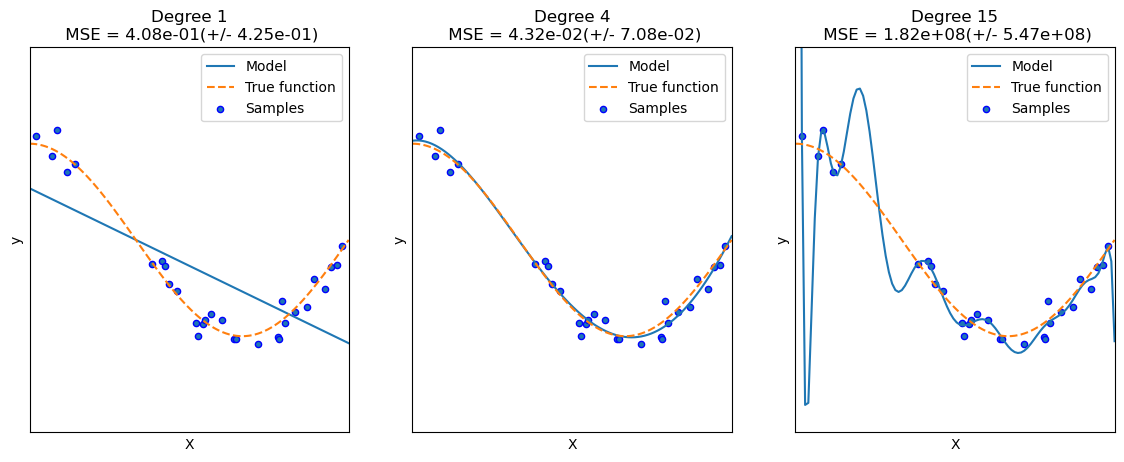

In [22]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())

    # 개별 degree별로 Polymonial 변환
    polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression=LinearRegression()
    pipeline=Pipeline([("polynomial_features",polynomial_features),('linear_regression',linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

    # 교차검증으로 다항회귀를 평가
    scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)

    #pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients=pipeline.named_steps['linear_regression'].coef_
    print(f'\nDegree {degrees[i]} 회귀계수는 {np.round(coefficients,2)}입니다.')
    print(f'Degree {degrees[i]} MSE는 {-1*np.mean(scores)}')

    # 0부터 1까지 테스트 데이터 세트에서 100개를 나눠 예측을 수행
    # 테스트 데이터 셋에 회귀예측을 수행하고 예측곡선과 실제곡선을 그려서 비교
    X_test=np.linspace(0,1,100)

    # 예측값 곡선
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label='Model')

    # 실제값 곡선
    plt.plot(X_test,true_fun(X_test),'--',label='True function')
    plt.scatter(X,y,edgecolors='b',s=20,label='Samples')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title(f'Degree {degrees[i]}\n MSE = {-scores.mean():.2e}(+/- {scores.std():.2e})')
